# Welcome to WoMa

This notebook aims to cover the basic usages of WoMa. Let's get started!

In [1]:
import woma

R_earth = 6371000
M_earth = 5.972E24

/home/sergio/Documents/WoMa/eos/sesame.py:133: RuntimeWarning: divide by zero encountered in log
  return A2_u, A2_P, A2_s, np.log(A1_rho), np.log(A1_T), np.log(A2_u)
/home/sergio/Documents/WoMa/eos/hm80.py:52: RuntimeWarning: divide by zero encountered in log
  log_u_max, num_u, log_u_step, np.log(A2_P), np.log(A2_T))


 ## 1. Spherical Profiles

Let us start building a simple spherical 1 layer planet.

We need to specify the following for every single planet we want to build:
- Equation of state for every material: we choose Tillotson granite.
- Relation temperature-density for every material: we choose a power relation $T=K\rho^\alpha$ with $\alpha=0$ (i.e. isothermal).
- Two out of the following three: pressure $P_{\rm s}$, temperature $T_{\rm s}$, and density $\rho_{\rm s}$ at the surface of our planet. We choose $P_{\rm s}=10^5\, \rm Pa$, and $T_{\rm s}=1000\, \rm K$.

In [2]:
l1_test = woma.Planet(
    name            = "my_first_planet",
    A1_mat_layer    = ['Til_granite'],
    A1_T_rho_type   = ['power'],
    A1_T_rho_args   = [[None, 0.]],     #alphas, K will be automatically computed
    P_s             = 1e5,
    T_s             = 1000
    )

For spherical 1 layer planets we need to specify the total radius $R$ or the total mass $M$ of the planet.
We say our planet has $R=R_\oplus$, and a possible maximum mass of $2M_\oplus$. These can also be defined as input in the cell above.

In [3]:
l1_test.R     = R_earth
l1_test.M_max = 2*M_earth

We now select the appropiate method and the planet gets built.

In [4]:
l1_test.gen_prof_L1_fix_M_given_R()

Finding M given R...
Done!
Planet "my_first_planet": 
    M            = 4.779e+24 kg = 0.80024 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["Til_granite"] 
    mat_id       = [101] 
    R_layer      = [1] R_earth
    M_layer      = [0.80024] M_earth
    M_frac_layer = [1] M_total
    idx_layer    = [9999] 
    P_s          = 1e+05 Pa
    T_s          = 1000 K
    rho_s        = 2142 kg/m^3
    P_0          = 1.6021e+11 Pa
    T_0          = 1000 K
    rho_0        = 6744.8 kg/m^3
    I_MR2        = 0.35357 M_tot*R_tot^2


Let's plot the results.

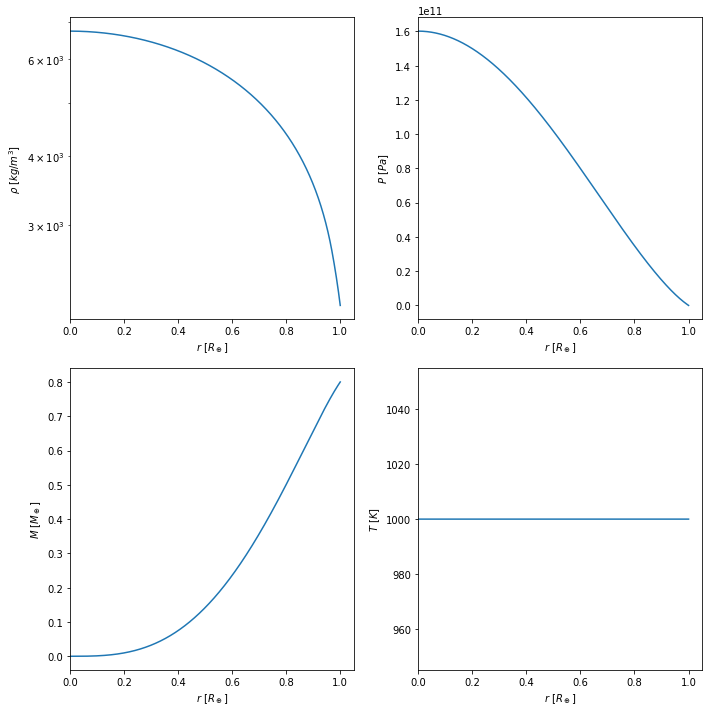

In [5]:
import matplotlib.pyplot as plt

def plot_spherical_profile(planet):
    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0,0].plot(planet.A1_r/R_earth, planet.A1_rho)
    ax[0,0].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[0,0].set_ylabel(r"$\rho$ $[kg/m^3]$")
    ax[0,0].set_yscale("log")
    ax[0,0].set_xlim(0, None)
    
    ax[1,0].plot(planet.A1_r/R_earth, planet.A1_m_enc/M_earth)
    ax[1,0].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[1,0].set_ylabel(r"$M$ $[M_\oplus]$")
    ax[1,0].set_xlim(0, None)
    
    ax[0,1].plot(planet.A1_r/R_earth, planet.A1_P)
    ax[0,1].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[0,1].set_ylabel(r"$P$ $[Pa]$")
    ax[0,1].set_xlim(0, None)
    
    ax[1,1].plot(planet.A1_r/R_earth, planet.A1_T)
    ax[1,1].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[1,1].set_ylabel(r"$T$ $[K]$")
    ax[1,1].set_xlim(0, None)
    
    plt.tight_layout()
    plt.show()
    
plot_spherical_profile(l1_test)

As mentioned before, for 1 layer planets we have two options:
- Fix the radius `R` and the maximum mass `M_max`, then the total mass is determined.
- Fix the mass `M` and the maximum radius `R_max`, then the total radius is determined.

Let us try the second option:

In [6]:
l1_test = woma.Planet(
    name            = "my_second_planet",
    A1_mat_layer    = ['Til_granite'],
    A1_T_rho_type   = ['power'],
    A1_T_rho_args   = [[None, 0.]],     # alphas
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R_max           = 2*R_earth
    )

Finding R given M:  60%|██████    | 24/40 [00:05<00:03,  5.03it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "my_second_planet": 
    M            = 5.972e+24 kg = 1 M_earth
    R            = 6.7301e+06 m = 1.0564 R_earth
    mat          = ["Til_granite"] 
    mat_id       = [101] 
    R_layer      = [1.0564] R_earth
    M_layer      = [1] M_earth
    M_frac_layer = [1] M_total
    idx_layer    = [9999] 
    P_s          = 1e+05 Pa
    T_s          = 1000 K
    rho_s        = 2142 kg/m^3
    P_0          = 2.0392e+11 Pa
    T_0          = 1000 K
    rho_0        = 7253.6 kg/m^3
    I_MR2        = 0.35164 M_tot*R_tot^2


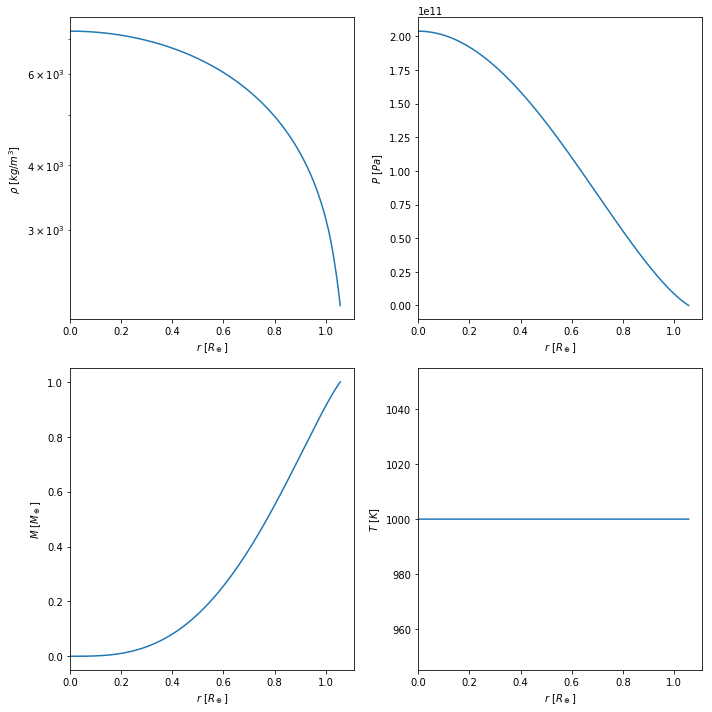

In [7]:
l1_test.gen_prof_L1_fix_R_given_M()
plot_spherical_profile(l1_test)

Let us continue with 2 layer planets. Let us choose a power relation temperature-density with $\alpha=0.5$ for our core, and $\alpha=1$ for our mantle.

In [8]:
l2_test = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1]],     #alphas
    P_s             = 1e5,
    T_s             = 300
    )

In this case we have many more combinations to determine all the gloval variables of our planet as a function of a few. See `woma.py` for full details.

We can, for instance, determine the mass of every layer `A1_M_layer` and a maximum radius `R_max`, then the boundary and total radius are automatic.

Finding R1 and R given M1, M2: 100%|██████████| 40/40 [03:23<00:00,  4.94s/it]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9714e+24 kg = 0.9999 M_earth
    R            = 6.2255e+06 m = 0.97717 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer      = [0.49371, 0.97717] R_earth
    M_layer      = [0.29992, 0.69997] M_earth
    M_frac_layer = [0.29996, 0.70004] M_total
    idx_layer    = [5052, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 2511.8 kg/m^3
    P_1          = 1.7795e+11 Pa
    T_1          = 833.37 K
    rho_1        = 12330 kg/m^3
    P_0          = 4.6593e+11 Pa
    T_0          = 940.89 K
    rho_0        = 15717 kg/m^3
    I_MR2        = 0.31628 M_tot*R_tot^2


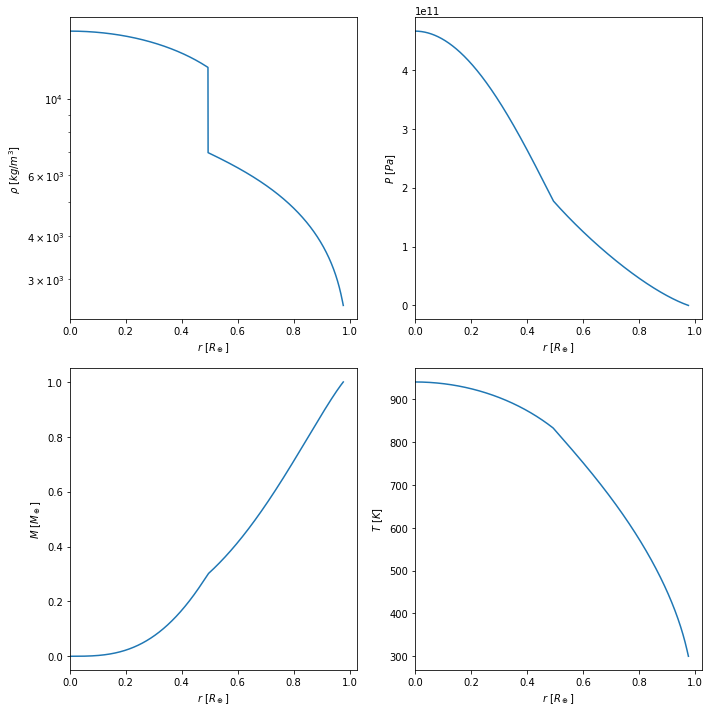

In [9]:
l2_test.A1_M_layer = [0.3*M_earth, 0.7*M_earth]
l2_test.R_max      = 2*R_earth

l2_test.gen_prof_L2_fix_R1_R_given_M1_M2()
plot_spherical_profile(l2_test)

Or, we could determine the total mass `M`, the radius `R`, and the boundary between materials gets automatically computed. Let us choose SESAME EoS for this example:

In [11]:
l2_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt'],
    A1_T_rho_type   = ['power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1]],     #alphas
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [None, R_earth]               # list with boundary and total radius
    )

Finding R1 given R, M: 100%|██████████| 40/40 [00:30<00:00,  1.24it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9712e+24 kg = 0.99987 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt"] 
    mat_id       = [300, 301] 
    R_layer      = [0.53115, 1] R_earth
    M_layer      = [0.35681, 0.64305] M_earth
    M_frac_layer = [0.35686, 0.64314] M_total
    idx_layer    = [5311, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 2818.9 kg/m^3
    P_1          = 1.4399e+11 Pa
    T_1          = 594.66 K
    rho_1        = 11680 kg/m^3
    P_0          = 4.5023e+11 Pa
    T_0          = 676.99 K
    rho_0        = 15138 kg/m^3
    I_MR2        = 0.31211 M_tot*R_tot^2


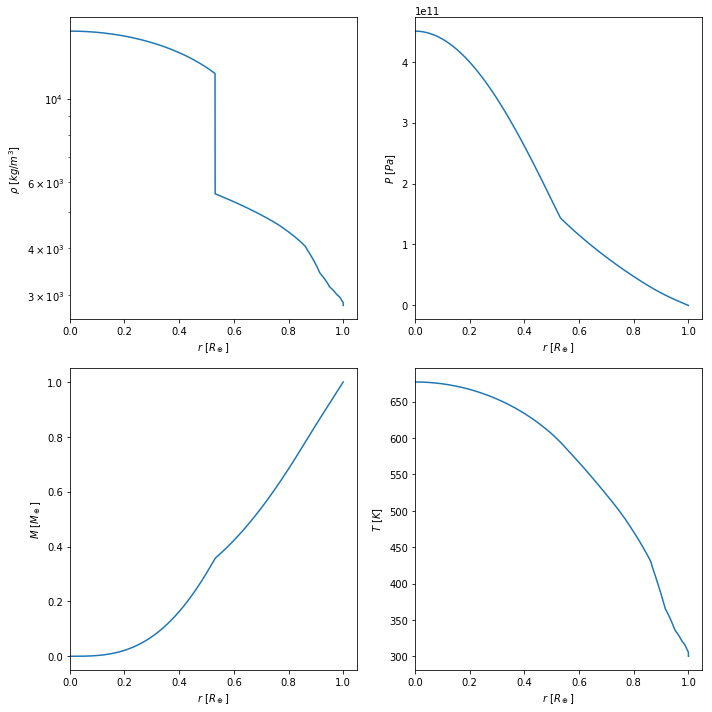

In [13]:
l2_test.gen_prof_L2_fix_R1_given_R_M()
plot_spherical_profile(l2_test)

Finally, we have 3 layer planets. In this example we determine the boundary mantle-atmosphere given the mass, radius, and boundary core-mantle

In [19]:
l3_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt', 'SS08_water'],
    A1_T_rho_type   = ['power', 'power', 'power'],
    A1_T_rho_args   = [[None, 0.5], [None, 1], [None, 1.5]],     #alphas
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [0.6*R_earth, None, R_earth]               # list with boundaries and total radius
    )

Finding R2 given M, R, R1: 100%|██████████| 40/40 [00:31<00:00,  1.19it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9732e+24 kg = 1.0002 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt", "SS08_water"] 
    mat_id       = [300, 301, 303] 
    R_layer      = [0.59996, 0.92389, 1] R_earth
    M_layer      = [0.51242, 0.43658, 0.051193] M_earth
    M_frac_layer = [0.51232, 0.4365, 0.051183] M_total
    idx_layer    = [5999, 9238, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 998.55 kg/m^3
    P_2          = 6.7629e+09 Pa
    T_2          = 579.4 K
    rho_2        = 3068.3 kg/m^3
    P_1          = 1.1761e+11 Pa
    T_1          = 1005.2 K
    rho_1        = 11175 kg/m^3
    P_0          = 5.177e+11 Pa
    T_0          = 1190.1 K
    rho_0        = 15663 kg/m^3
    I_MR2        = 0.27731 M_tot*R_tot^2


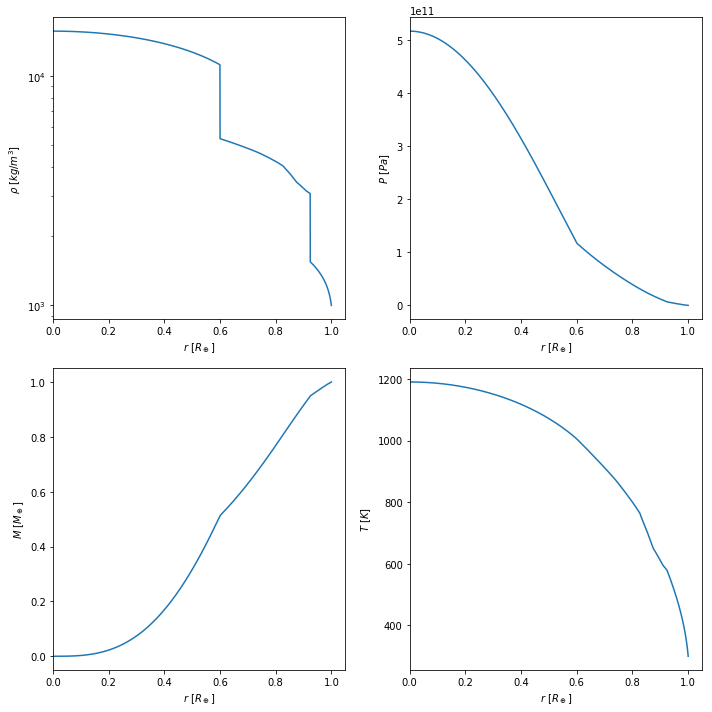

In [21]:
l3_test.gen_prof_L3_fix_R2_given_R_M_R1()
plot_spherical_profile(l3_test)

In this final example, we determine boundary core-mantle and boundary mantle-atmosphere given the radius, mass and moment of inertia.

In [2]:
import woma

R_earth = 6371000
M_earth = 5.972E24

/home/sergio/Documents/WoMa/eos/sesame.py:133: RuntimeWarning: divide by zero encountered in log
  return A2_u, A2_P, A2_s, np.log(A1_rho), np.log(A1_T), np.log(A2_u)
/home/sergio/Documents/WoMa/eos/hm80.py:52: RuntimeWarning: divide by zero encountered in log
  log_u_max, num_u, log_u_step, np.log(A2_P), np.log(A2_T))


In [15]:
l3_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt', 'SESAME_water'],
    A1_T_rho_type   = ['power', 'power', 'power'],
    A1_T_rho_args   = [[None, 0.], [None, 0.], [None, 0.]],     #alphas
    P_s             = 1,
    T_s             = 500,
    M               = M_earth,
    A1_R_layer      = [None, None, R_earth],               # list with boundaries and total radius
    I_MR2           = 0.3*M_earth*R_earth**2,
    num_attempt     = 5,
    num_attempt_2   = 5
    )

In [16]:
l3_test.gen_prof_L3_fix_R1_R2_given_R_M_I()
plot_spherical_profile(l3_test)

Finding R1 given R, M: 100%|██████████| 40/40 [00:27<00:00,  1.40it/s]


ValueError: Critical error in find_rho.

In [22]:
woma.eos.P_T_rho(1e200, 1e200, 302)

0.0

## 2. SPH particle placement for spherical profiles